In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataPrice = pd.read_csv('price_availability.csv', sep=';')
dataListing = pd.read_csv('listings_final.csv', sep=';')

In [7]:
df = dataPrice.join(dataListing, lsuffix='listing_id', rsuffix='listing_id')

In [12]:
df = df.loc[:, ~df.columns.duplicated()]
#prix moyen observés par appartement
df = df.groupby('listing_idlisting_id').mean()
df = df.dropna()
df

,available,local_price,min_nights,Unnamed: 0,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,pricing_weekly_factor,pricing_monthly_factor
listing_idlisting_id,,,,,,,,,,,,
10270,0.511688,105.779221,4.937662,159.0,48.855684,2.339710,2.000000,1.000000,0.333333,1.000000,0.950000,0.900000
26084,0.119792,79.000000,3.000000,684.0,48.857813,2.343273,3.333333,2.333333,1.000000,1.333333,0.976667,0.940000
48498,0.358839,174.630607,2.000000,482.0,48.862750,2.340100,1.666667,1.000000,0.333333,1.000000,0.916667,0.833333
130420,0.697436,183.192308,1.000000,430.0,48.865459,2.368301,3.666667,2.000000,1.333333,1.000000,0.883333,0.850000
274590,0.778846,365.000000,4.000000,333.5,48.864731,2.348291,4.500000,2.250000,1.250000,1.375000,0.920000,0.720000
...,...,...,...,...,...,...,...,...,...,...,...,...
28536370,0.900000,908.684211,2.000000,266.0,48.864850,2.360108,3.666667,2.000000,0.666667,1.000000,0.903333,0.693333
28595642,0.802734,453.638672,1.031250,749.5,48.861943,2.329686,2.500000,1.250000,0.750000,1.000000,1.000000,1.000000
28660738,0.240209,76.000000,90.000000,912.0,48.868984,2.360548,3.000000,2.000000,1.333333,1.333333,1.000000,1.000000


In [39]:
from sklearn.model_selection import train_test_split

X = np.array(df[['person_capacity', 'beds', 'bedrooms', 'bathrooms']])
y = np.array(df[['local_price']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(221, 4)
(96, 4)
(221, 1)
(96, 1)


(0.0, 2000.0)

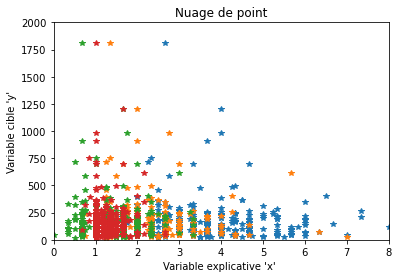

In [40]:
plt.plot(X,y,'*')
plt.xlabel("Variable explicative 'x' ")
plt.ylabel("Variable cible 'y'")
plt.title("Nuage de point")
plt.xlim([0, 8])  
plt.ylim([0, 2000])

In [41]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_test,y_test)
reg.score(X_test,y_test)

reg.coef_

reg.intercept_

reg.predict(X_test)

array([[256.36097304],
       [189.55218849],
       [169.0936816 ],
       [191.54312305],
       [169.63944016],
       [225.61992059],
       [168.6186661 ],
       [187.56084159],
       [168.46950742],
       [191.39396438],
       [149.82684052],
       [120.95432455],
       [217.82806977],
       [191.39396438],
       [154.51840457],
       [162.96851209],
       [  8.13711199],
       [ 94.19514122],
       [185.74381037],
       [160.20584825],
       [173.97050276],
       [194.90361281],
       [188.3329832 ],
       [128.12158885],
       [191.39396438],
       [165.06563346],
       [178.40103914],
       [138.82526218],
       [ 73.41279342],
       [144.54907921],
       [196.74580104],
       [185.89296904],
       [164.03936049],
       [134.39390112],
       [199.65922713],
       [162.81935341],
       [140.04405513],
       [193.83397854],
       [196.12910736],
       [182.14741643],
       [174.23180536],
       [165.62435998],
       [204.83555687],
       [189